# Social Network Analysis @ UNIPI
### 19/07/2023

In [1]:
import warnings
warnings.filterwarnings('ignore')

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Second Half

## Exercise 1: Community Evaluation [4 points]

Given the Graph G in Figure 1, compare the following partitions:

- P1: [ [A,C,E,H,I], [B,D,F,G,L] ]
- P2: [ [A,B,D,E,F,G,L], [C,H,I] ]

Which partition is the best with respect to Conductance? and with respect to Internal Edge Density (IED)?

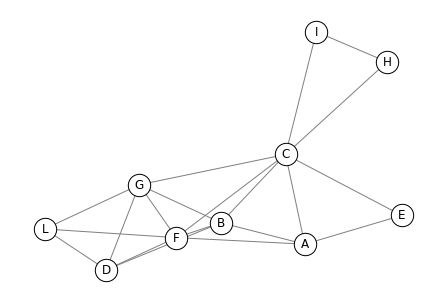

In [2]:
g = nx.Graph()

g.add_edge('A', 'C')
g.add_edge('B', 'D')
g.add_edge('C', 'E')
g.add_edge('F', 'G')
g.add_edge('H', 'I')
g.add_edge('B', 'G')
g.add_edge('C', 'I')
g.add_edge('C', 'H')
g.add_edge('G', 'D')
g.add_edge('E', 'A')
g.add_edge('B', 'F')
g.add_edge('G', 'C')
g.add_edge('D', 'F')
g.add_edge('D', 'L')
g.add_edge('L', 'G')
g.add_edge('C', 'B')
g.add_edge('F', 'C')
g.add_edge('F', 'L')
g.add_edge('F', 'B')
g.add_edge('F', 'A')
g.add_edge('A', 'B')

# Set the positions of nodes for visualization
pos = nx.spring_layout(g)

# Draw the graph
nx.draw(g, pos, with_labels=True, edge_color='gray')
nodes = nx.draw_networkx_nodes(g, pos, node_size=500, node_color='white')
# Set edge color to red
nodes.set_edgecolor('black')

#plt.savefig('20231907_graph_second.png')

In [3]:
p1 = [ ['A','C','E','H','I'], ['B','D','F','G','L'] ]
p2 = [ ['A','B','D','E','F','G','L'], ['C','H','I'] ]

In [4]:
def conductance(graph, community):
    gs = nx.subgraph(graph, community)
    ec = gs.number_of_edges()
    eoc = sum([len(list(graph.neighbors(u)))-len(list(gs.neighbors(u))) for u in community])
    return (2*eoc)/((2*ec)+eoc)

def ied(graph, community):
    sg = nx.subgraph(graph, community)
    ec = sg.number_of_edges()
    vc = sg.number_of_nodes()
    try:
        return (2*ec)/(vc*(vc-1))
    except:
        return 0

### Conductance

In [5]:
f"P1 - C1: {conductance(g, p1[0])} C2: {conductance(g, p1[1])}"

'P1 - C1: 0.5882352941176471 C2: 0.43478260869565216'

In [6]:
f"P2 - C1: {conductance(g, p2[0])} C2: {conductance(g, p2[1])}"

'P2 - C1: 0.3448275862068966 C2: 0.9090909090909091'

In [7]:
c1 = max(conductance(g, p1[0]), conductance(g, p1[1]))
c2 = max(conductance(g, p2[0]), conductance(g, p2[1]))

min(c1,c2)

0.5882352941176471

### IED

In [8]:
f"P1 - C1: {ied(g, p1[0])} C2: {ied(g, p1[1])}"

'P1 - C1: 0.6 C2: 0.9'

In [9]:
f"P2 - C1: {ied(g, p2[0])} C2: {ied(g, p2[1])}"

'P2 - C1: 0.5714285714285714 C2: 1.0'

In [10]:
c1 = min(ied(g, p1[0]), ied(g, p1[1]))
c2 = min(ied(g, p2[0]), ied(g, p2[1]))

max(c1,c2)

0.6

## Exercise 2: Link Prediction [4 points]

Given the Graph in Figure 1, consider the set $T=[[(A, F), (F, L), (C, I), (D, L)]]$. Solve the following exercises:

1) Compute for all the links in the set the AdamicAdar and Preferential Attachment scores, then discuss the main differences in the results;

2 Compute for all the links in the set the Jaccard score. Then, propose an asymmetric Jaccard score formalized as follows: <i> How many friends we share compared to the total number of my friends? </i> You should able to have a different score when measuring, for instance, $Jaccard(A,F)$ and $Jaccard(F,A)$. Discuss the main differences in the results.

In [11]:
T = [('A', 'F'), ('F', 'L'), ('C', 'I'), ('D', 'L')]

In [12]:
#g.remove_edges_from(T)

### 1) AdamicAdar and Preferential Attachment

In [13]:
res = list(nx.adamic_adar_index(g, T))
sorted(res, key=lambda x: -x[2])

[('C', 'I', 1.4426950408889634),
 ('F', 'L', 1.3426824550040934),
 ('D', 'L', 1.179445561110859),
 ('A', 'F', 1.1352332769293625)]

In [14]:
res = list(nx.preferential_attachment(g, T))
sorted(res, key=lambda x: -x[2])

[('A', 'F', 24), ('F', 'L', 18), ('C', 'I', 14), ('D', 'L', 12)]

### 2) Jaccard and Directed Jaccard Variant

In [15]:
def asym_jaccard(g, u, v):
    n_u = set(g.neighbors(u))
    n_v = set(g.neighbors(v))
    cm = len(n_u & n_v)
    
    j_u = 0
    j_v = 0
    if len(n_u) == 1:
        j_u = 0
    elif len(n_v) == 1:
        j_v = 0
    else:
        j_u = cm / (len(n_u)-1)
        j_v = cm / (len(n_v)-1)
        
    return j_u, j_v

In [16]:
res = list(nx.jaccard_coefficient(g, T))
sorted(res, key=lambda x: -x[2])

[('D', 'L', 0.4),
 ('F', 'L', 0.2857142857142857),
 ('A', 'F', 0.25),
 ('C', 'I', 0.125)]

In [17]:
for u, v in T:
    print([u, v, asym_jaccard(g, u, v)[0]],
          [v, u, asym_jaccard(g, v, u)[0]])

['A', 'F', 0.6666666666666666] ['F', 'A', 0.4]
['F', 'L', 0.4] ['L', 'F', 1.0]
['C', 'I', 0.16666666666666666] ['I', 'C', 1.0]
['D', 'L', 0.6666666666666666] ['L', 'D', 1.0]


## Exercise 3: Stream Graph [5 points]

Given the stream graph in Figure:

1) Compute the number of nodes and the number of links;

2) Is there at least one \emph{shortest path} between "a" and "f"? Is there at least one \emph{fastest path}? Is there at least one \emph{foremost path}?

3) Is [('c', 'd', 0), ('d', 'e', 1)] a \emph{fastest path}? Why/why not? Is [('c', 'd', 9), ('d', 'e', 10)] a \emph{foremost path}? Why/why not? Is [('c', 'd', 9), ('d', 'e', 10)] a \emph{fastest path}? Why/why not?

4 Is the stream graph in the figure also a \emph{link stream?} Why/why not?

1) $n=\frac{37}{12}$, $m=\frac{24}{12}$

2) (('a', 'b', 5), ('b', 'c', 6), ('c', 'd', 7), ('d', 'e', 10), ('e', 'f', 11))

alternatively, ('c', 'd', 8) or ('c', 'd', 9)

3) sì, no, sì

4) no

## Exercise 4: Open Question [3 points]

What are the community dynamics that a benchmark for dynamic community detection should model? Discuss some of them.